# Labs Access Analysis: 03 Map Plot

## Setup

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import branca.colormap as cmp
import os
import time
import folium

sns.set()
#sns.set_style("whitegrid") # Seaborn style

In [7]:
# Load data, json
with open('data/isochrones.json') as json_file:
    data = json.load(json_file)

In [8]:
# Load data, csv
data_csv = pd.read_csv('data/labs.csv')

In [9]:
locations = {}
for i in data:
  locations[i['name']] = i['metadata']['query']['locations'][0]

## Map Visualization

In [10]:
m=folium.Map(location=[41.396721,2.1943200000000003])
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)

In [11]:
for loc in locations:
  folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(m)

In [7]:
m

In [2]:
rows = []
for h in data:
  rows.append([h["name"], h["features"][0]["properties"]["total_pop"], h["features"][0]["properties"]["area"], h["features"][0]["properties"]["reachfactor"], h["features"][0]["geometry"]["coordinates"], []])

NameError: name 'data' is not defined

In [9]:
map_data = pd.DataFrame(rows, columns=['Name', 'total_pop', 'area', 'reachfactor','geometry', 'isochrone'])
map_data.head()

,Name,total_pop,area,reachfactor,geometry,isochrone
0,Fab Lab Barcelona,10677.0,408517.43,0.7490,"[[[2.190358, 41.397167], [2.190397, 41.395316]...",[]
1,MADE Makerspace Barcelona,9361.0,377533.04,0.6922,"[[[2.137155, 41.372965], [2.137423, 41.371969]...",[]
2,Soko Lab,6686.0,355796.12,0.6523,"[[[2.18548, 41.42297], [2.185484, 41.422845], ...",[]
3,LSCongres,9361.0,376093.46,0.6896,"[[[2.177917, 41.425484], [2.177921, 41.425281]...",[]
4,Green Fab Lab,3075.0,412411.27,0.7561,"[[[2.136123, 41.490507], [2.136209, 41.490157]...",[]


In [10]:
# Create a flip isochrone cell for each lab
for ind in map_data.index:
     row_iso = []
     for coords in map_data['geometry'][ind][0]:
       row_iso.append([coords[1], coords[0], 900])
     map_data.at[ind, 'isochrone'] = row_iso

In [11]:
map_data.set_index('Name', inplace=True)
data_csv.set_index('Name', inplace=True)

In [12]:
# Add columns from the .csv to the .json
full_map_data = map_data.join(data_csv)

In [13]:
full_map_data

,total_pop,area,reachfactor,geometry,isochrone,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes
Name,,,,,,,,,,,,,,,
Fab Lab Barcelona,10677.0,408517.43,0.7490,"[[[2.190358, 41.397167], [2.190397, 41.395316]...","[[41.397167, 2.190358, 900], [41.395316, 2.190...",Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",8005.0,41.396721,2.194320,Fablabs.io,https://fablabbcn.org/,NaN
MADE Makerspace Barcelona,9361.0,377533.04,0.6922,"[[[2.137155, 41.372965], [2.137423, 41.371969]...","[[41.372965, 2.137155, 900], [41.371969, 2.137...",Fab Lab,Barcelona,BCN,Carrer Noguera Pallaresa 59-61,8014.0,41.373060,2.141190,"Fablabs.io, Hackerspaces.org, Makerspaces.make.co",NaN,NaN
Soko Lab,6686.0,355796.12,0.6523,"[[[2.18548, 41.42297], [2.185484, 41.422845], ...","[[41.42297, 2.18548, 900], [41.422845, 2.18548...",Fab Lab,Barcelona,BCN,"Carrer de Vallès i Ribot, 36",8027.0,41.424230,2.188890,Fablabs.io,https://soko.tech/,NaN
LSCongres,9361.0,376093.46,0.6896,"[[[2.177917, 41.425484], [2.177921, 41.425281]...","[[41.425484, 2.177917, 900], [41.425281, 2.177...",Fab Lab,Barcelona,BCN,"Carrer del Cardenal Tedeschini, 50",8027.0,41.425930,2.182020,Fablabs.io,https://fablabs.io/labs/lscongres,NaN
Green Fab Lab,3075.0,412411.27,0.7561,"[[[2.136123, 41.490507], [2.136209, 41.490157]...","[[41.490507, 2.136123, 900], [41.490157, 2.136...",Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.491100,2.140800,Fablabs.io,NaN,NaN
Barcelona Mobility LAB,8024.0,303938.51,0.5573,"[[[2.195368, 41.433601], [2.197359, 41.432428]...","[[41.433601, 2.195368, 900], [41.432428, 2.197...",Fab Lab,Barcelona,BCN,Passatge del Torrent de l'Estadella 56,8030.0,41.434180,2.200130,Fablabs.io,NaN,NaN
Fab Lab Sant Cugat,1594.0,303162.22,0.5558,"[[[2.086768, 41.469616], [2.08692, 41.46929], ...","[[41.469616, 2.086768, 900], [41.46929, 2.0869...",Fab Lab,Sant Cugat del Vallès,BCN,"Avinguda de la Torre Blanca, 57",8712.0,41.468830,2.090520,Fablabs.io,NaN,NaN
Fab Lab Terrassa,4069.0,395146.05,0.7245,"[[[2.017504, 41.563374], [2.017509, 41.563343]...","[[41.563374, 2.017504, 900], [41.563343, 2.017...",Fab Lab,Terrassa,BCN,"Carrer de Colom 1, Escola d'Enginyería de Terr...",8222.0,41.564110,2.022330,Fablabs.io,NaN,NaN
The FabLab: Make in Milano,4210.0,358156.48,0.6567,"[[[9.17775, 45.460375], [9.177752, 45.460369],...","[[45.460375, 9.17775, 900], [45.460369, 9.1777...",Fab Lab,Milan,MI,"Via Santa Marta, 18",20123.0,45.461750,9.182390,Fablabs.io,NaN,NaN


## Population reached

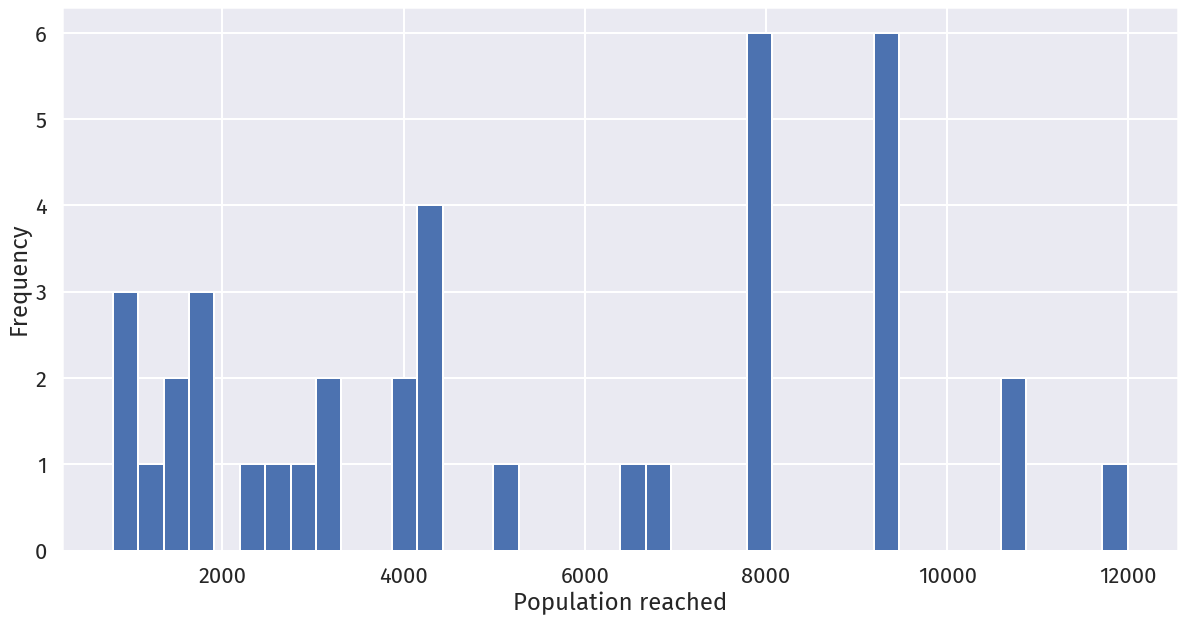

In [14]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data["total_pop"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Population reached')
plt.savefig("svg/labs_population_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_population_hist.png", dpi=300, bbox_inches="tight")

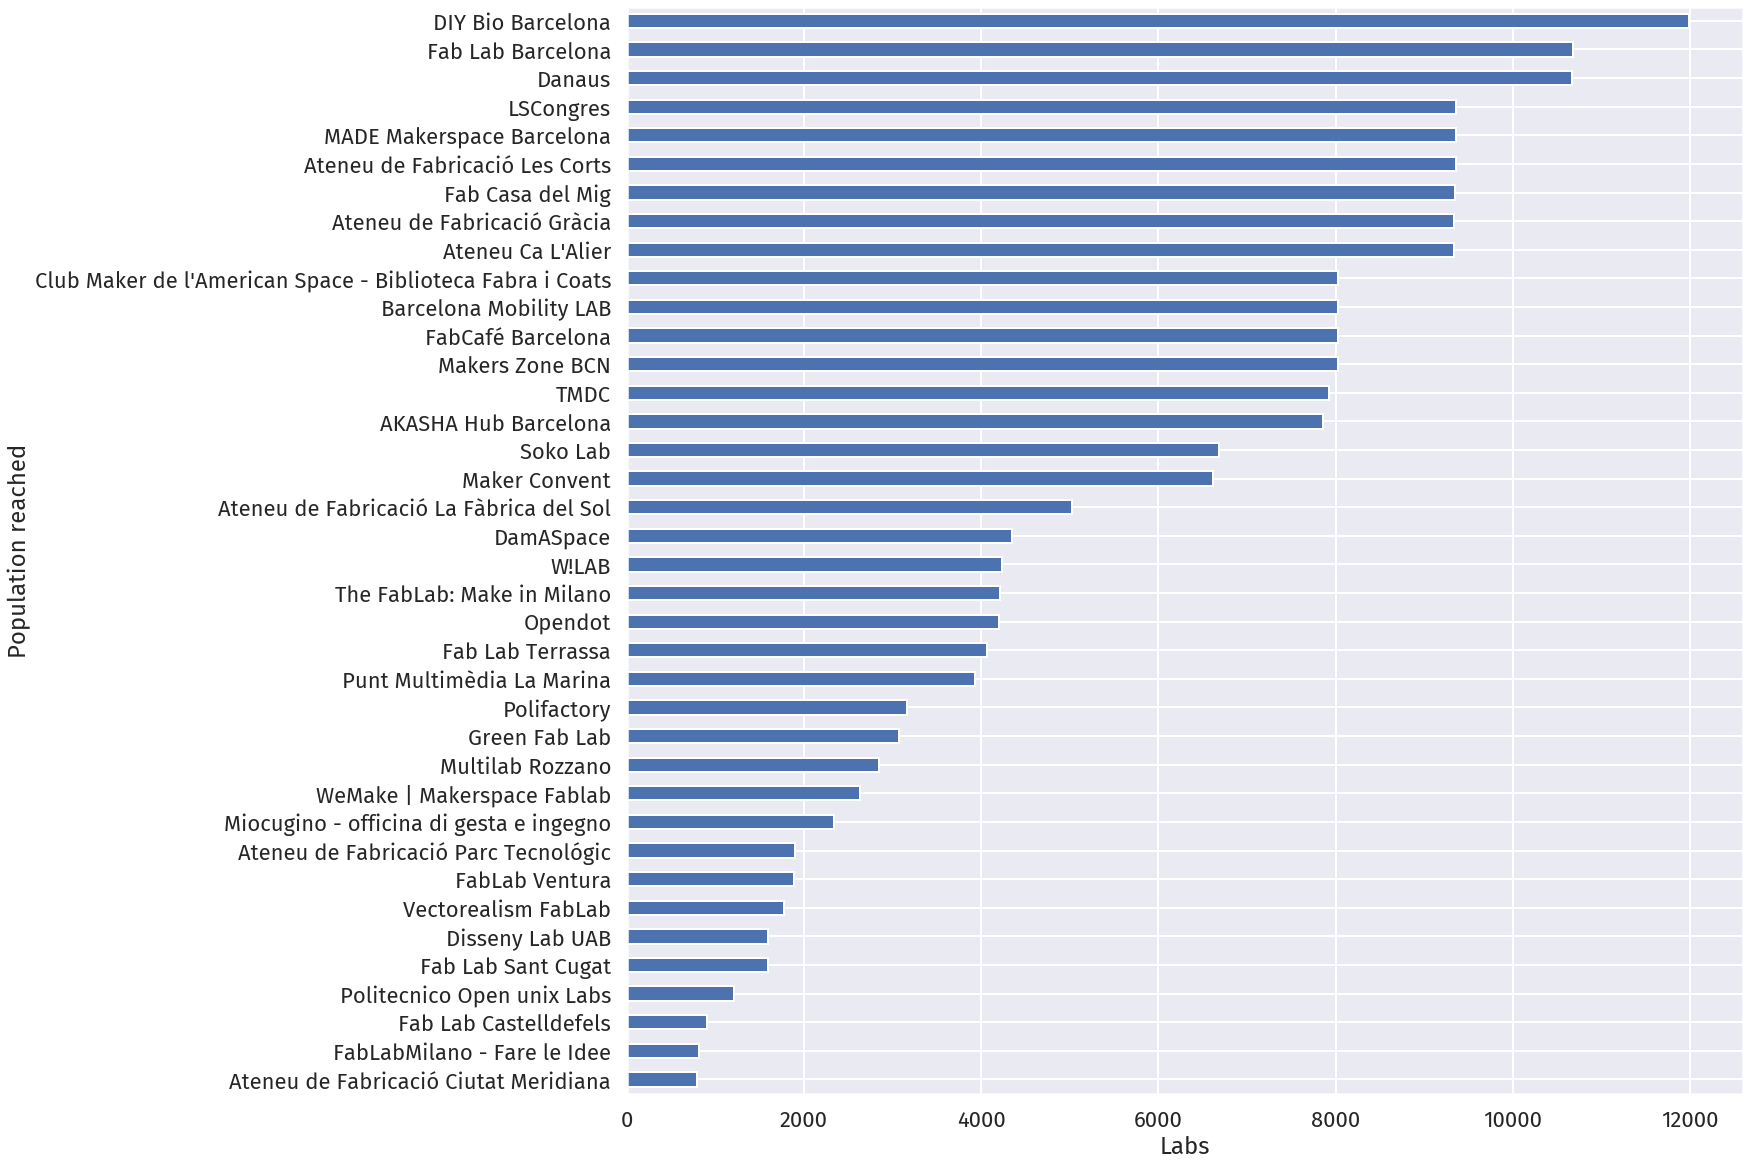

In [15]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind="barh", figsize=(20,20))
plt.ylabel('Population reached')
plt.xlabel('Labs')
plt.savefig("svg/labs_population_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_population_bar.png", dpi=300, bbox_inches="tight")

## Area reached

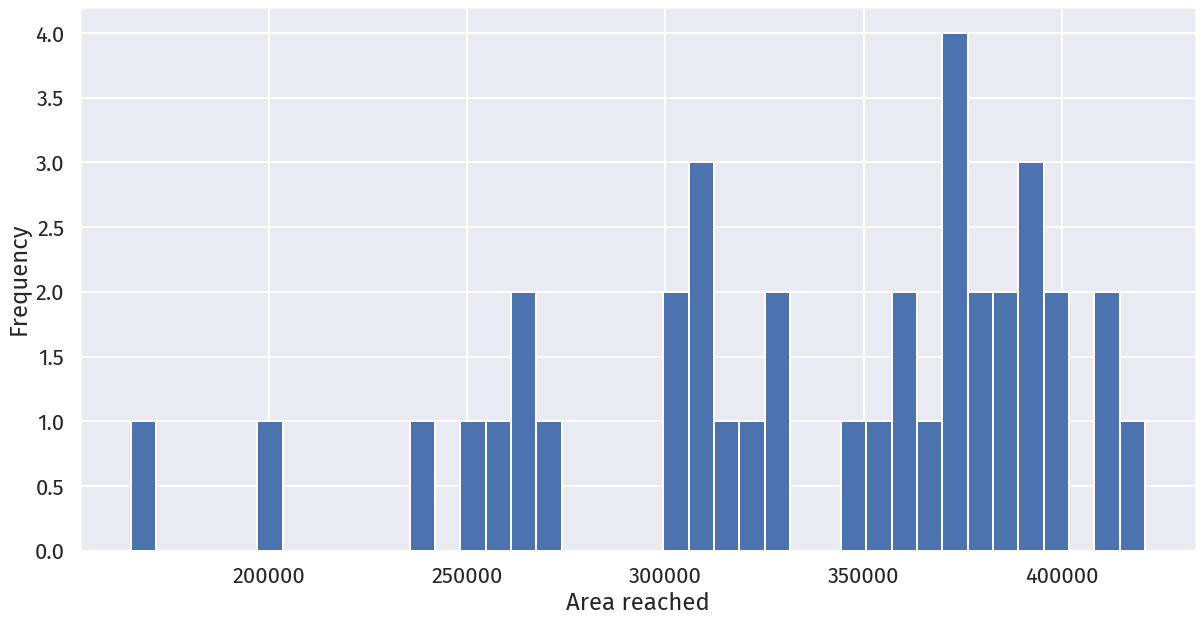

In [16]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data["area"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Area reached')
plt.savefig("svg/labs_area_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_area_hist.png", dpi=300, bbox_inches="tight")

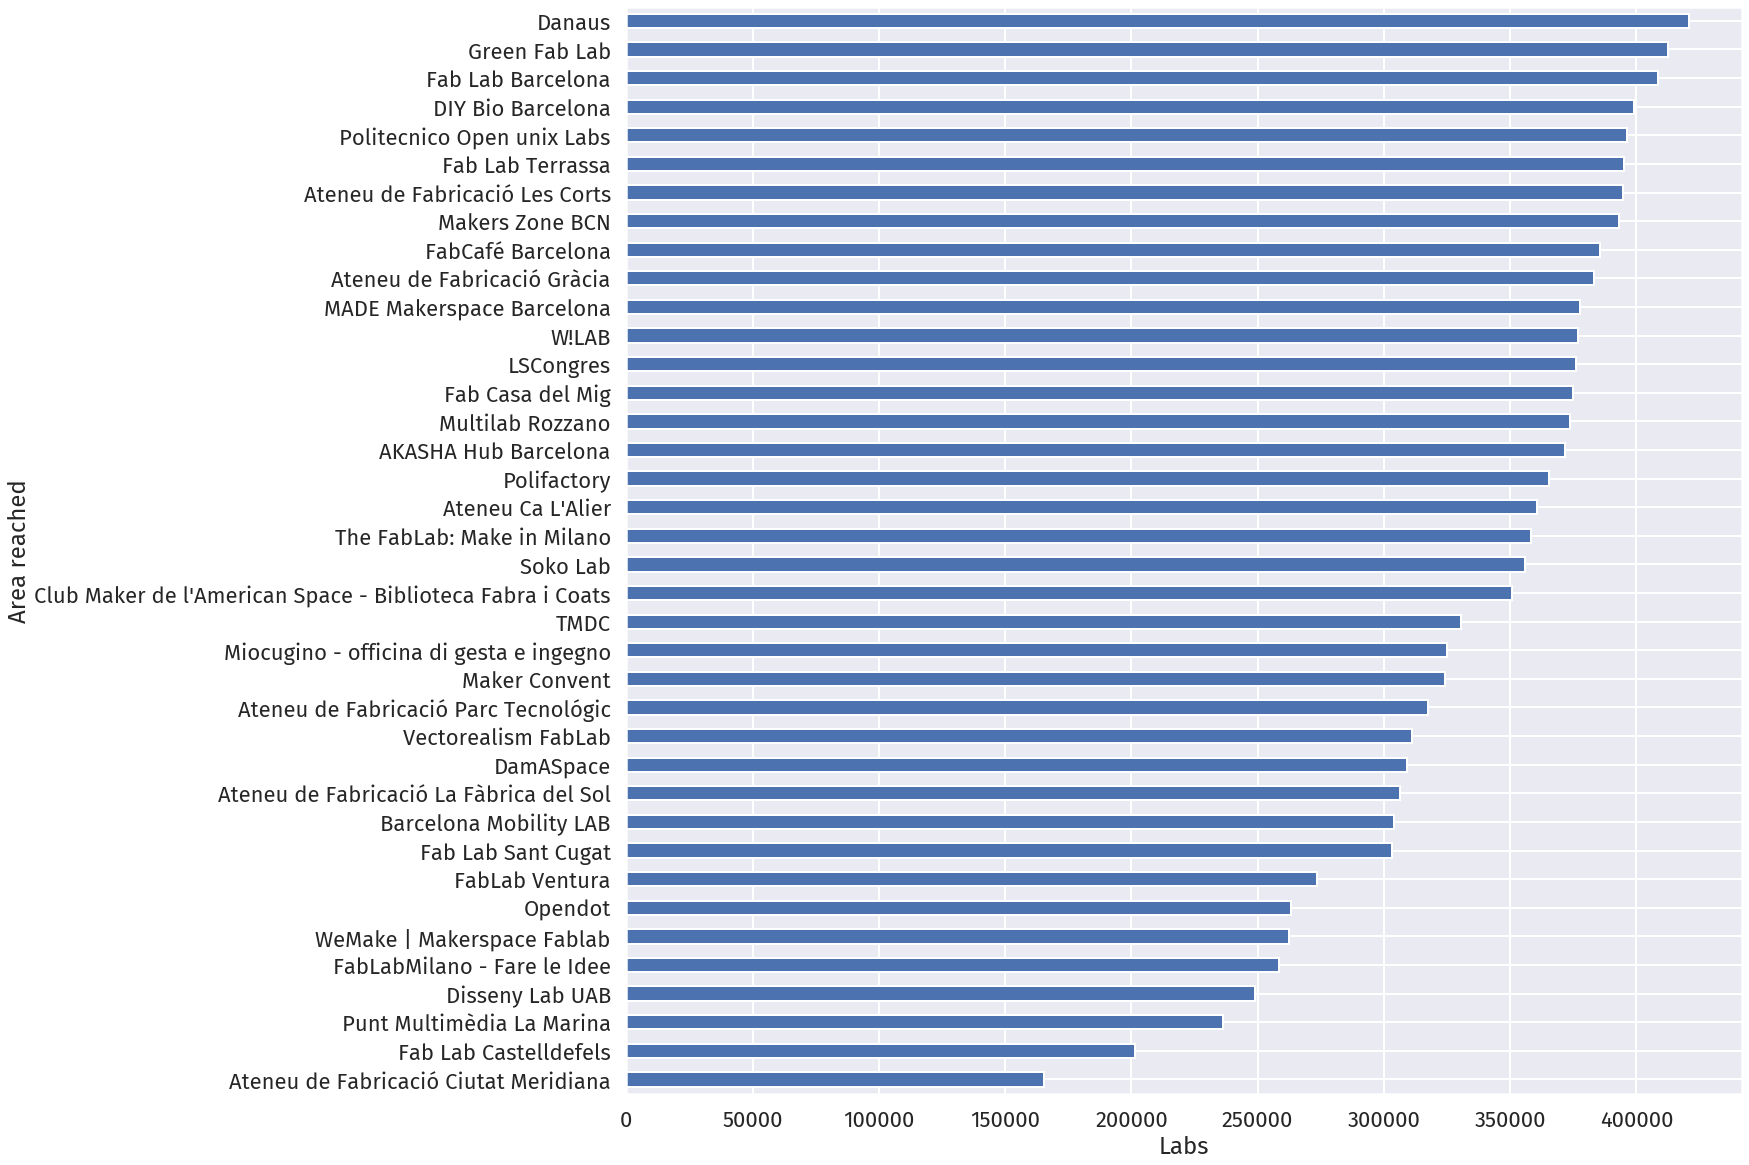

In [17]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data.sort_values(by=['area'])['area'].plot(kind="barh", figsize=(20,20))
plt.ylabel('Area reached')
plt.xlabel('Labs')
plt.savefig("svg/labs_area_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_area_bar.png", dpi=300, bbox_inches="tight")

## Reach Factor

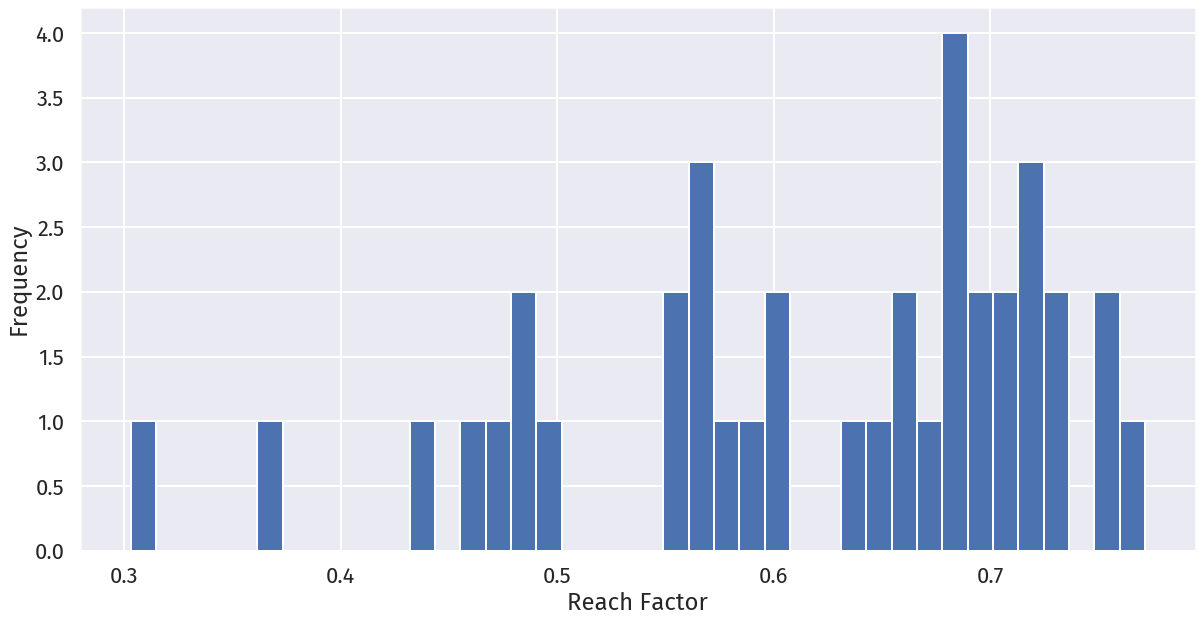

In [18]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Reach Factor')
plt.savefig("svg/labs_reachfactor_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_reachfactor_hist.png", dpi=300, bbox_inches="tight")

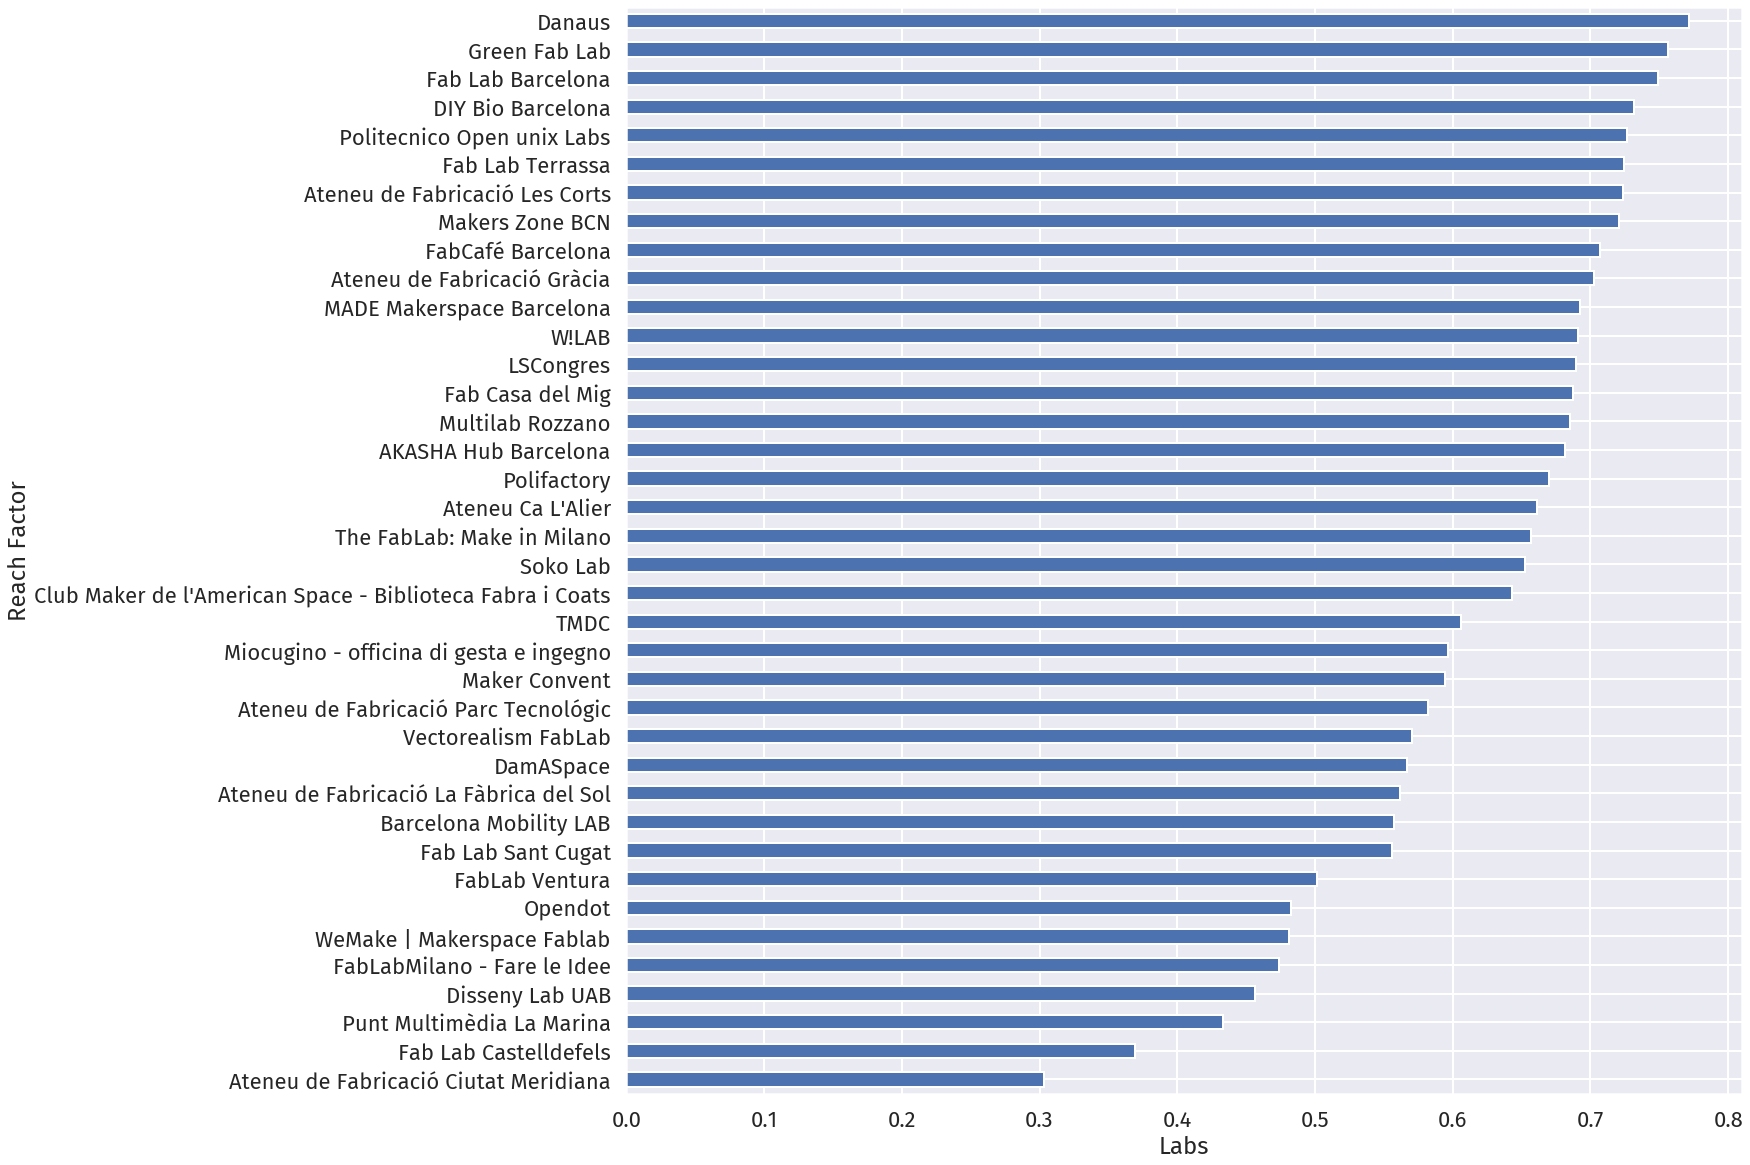

In [19]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind="barh", figsize=(20,20))
plt.ylabel('Reach Factor')
plt.xlabel('Labs')
plt.savefig("svg/labs_reachfactor_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_reachfactor_bar.png", dpi=300, bbox_inches="tight")

## Labs values clustered by city

In [20]:
full_map_data.groupby(["Cluster","Type"]).size()

Cluster  Type                
BCN      Ateneu de Fabricació     6
         City Space               2
         DIYBio Lab               1
         Fab Lab                 10
         FabCafé                  1
         Hackerspace              2
         Library                  1
         Makerspace               4
MI       Fab Lab                  9
         Hackerspace              1
         Makerspace               1
dtype: int64

In [21]:
full_map_data.groupby("Cluster")["total_pop"].sum()

Cluster
BCN    177756.0
MI      29428.0
Name: total_pop, dtype: float64

In [22]:
full_map_data.groupby("Cluster")["total_pop"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
BCN,27.0,6583.555556,3347.772018,793.0,4002.0,7929.0,9345.0,11990.0
MI,11.0,2675.272727,1221.765779,814.0,1829.0,2628.0,3687.5,4344.0


In [23]:
full_map_data.groupby("Cluster")["area"].sum()

Cluster
BCN    9273958.80
MI     3496875.56
Name: area, dtype: float64

In [24]:
full_map_data.groupby("Cluster")["area"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
BCN,27.0,343479.955556,65879.738103,165208.00,311790.73,371771.07,389271.38,420899.33
MI,11.0,317897.778182,49880.420131,258344.53,268366.14,311251.64,361837.52,396183.96


In [25]:
full_map_data.groupby("Cluster")["reachfactor"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
BCN,27.0,0.629756,0.120790,0.3029,0.57170,0.6816,0.71370,0.7717
MI,11.0,0.582873,0.091457,0.4737,0.49205,0.5707,0.66345,0.7264


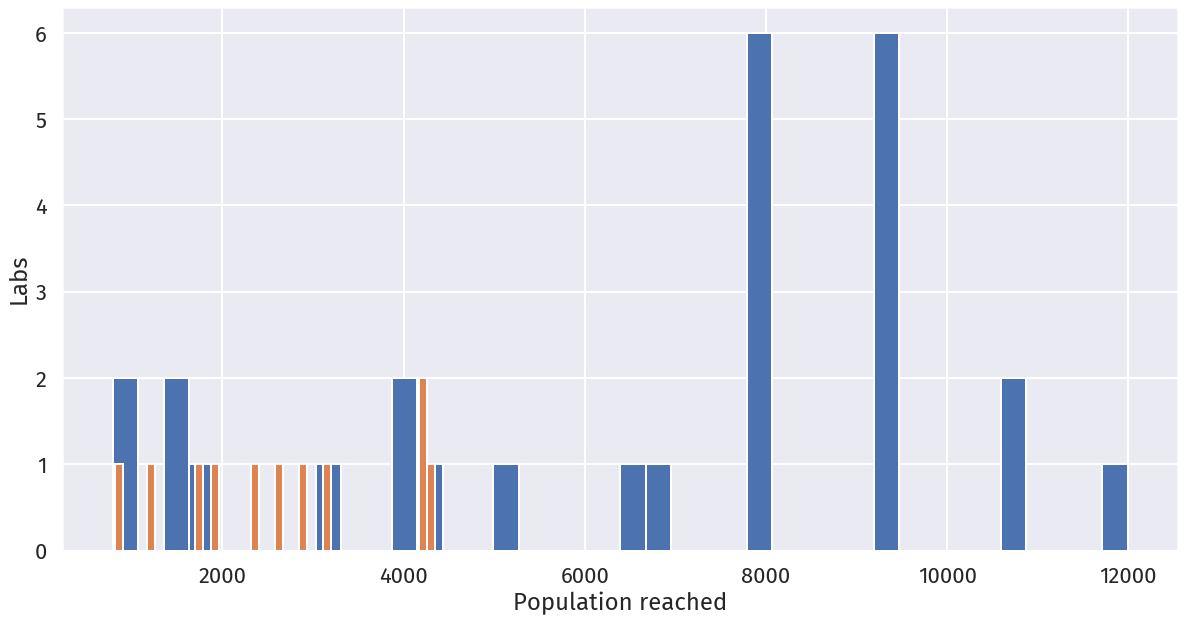

In [26]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
full_map_data.groupby("Cluster")["total_pop"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg/labs_population_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_population_grouped_hist.png", dpi=300, bbox_inches="tight")

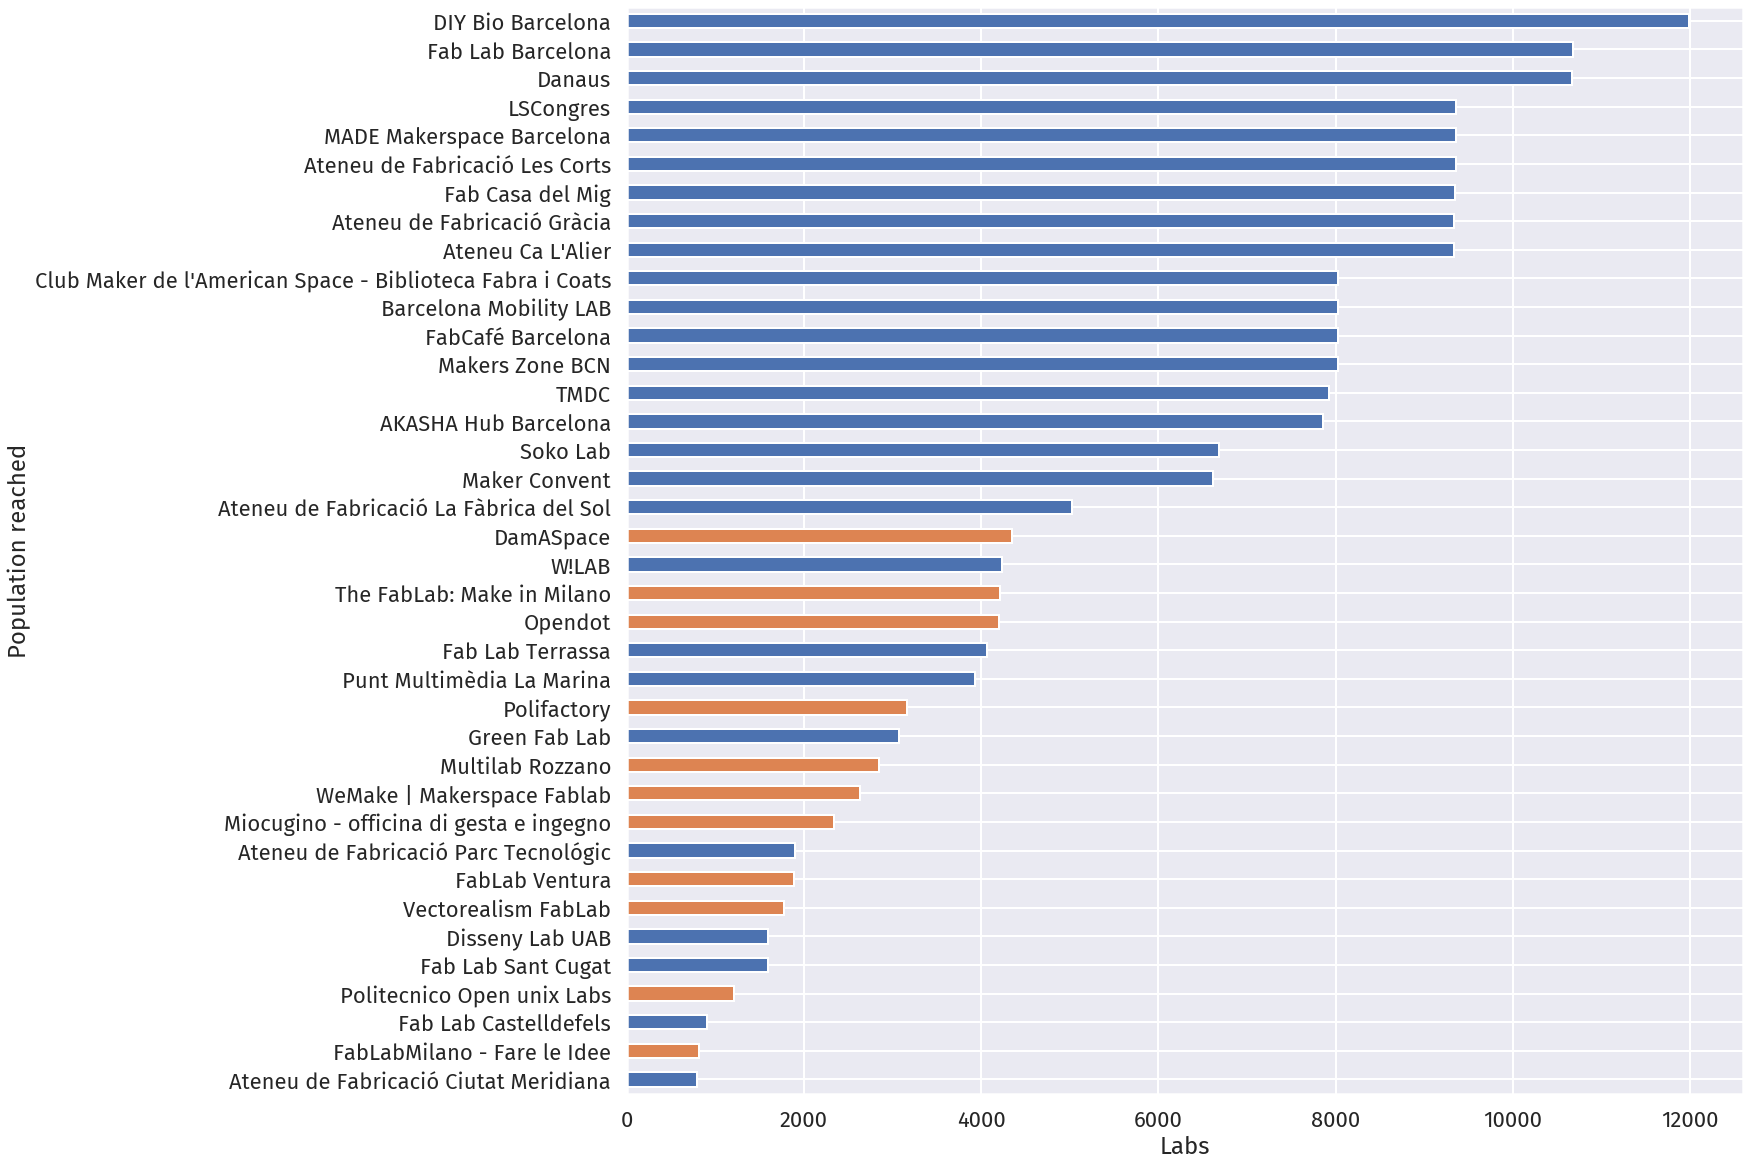

In [27]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
full_map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['total_pop'])['Cluster']], figsize=(20,20))
plt.ylabel('Population reached')
plt.xlabel('Labs')
plt.savefig("svg/labs_population_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_population_grouped_bar.png", dpi=300, bbox_inches="tight")

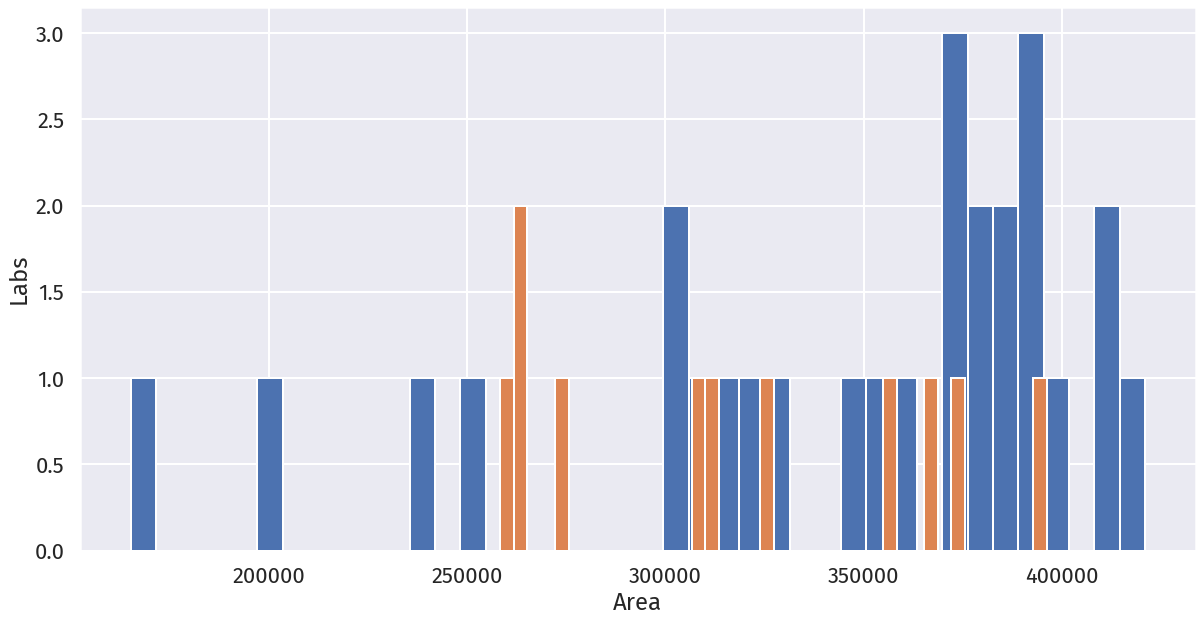

In [28]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
full_map_data.groupby("Cluster")["area"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Area')
plt.ylabel('Labs')
plt.savefig("svg/labs_area_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_area_grouped_hist.png", dpi=300, bbox_inches="tight")

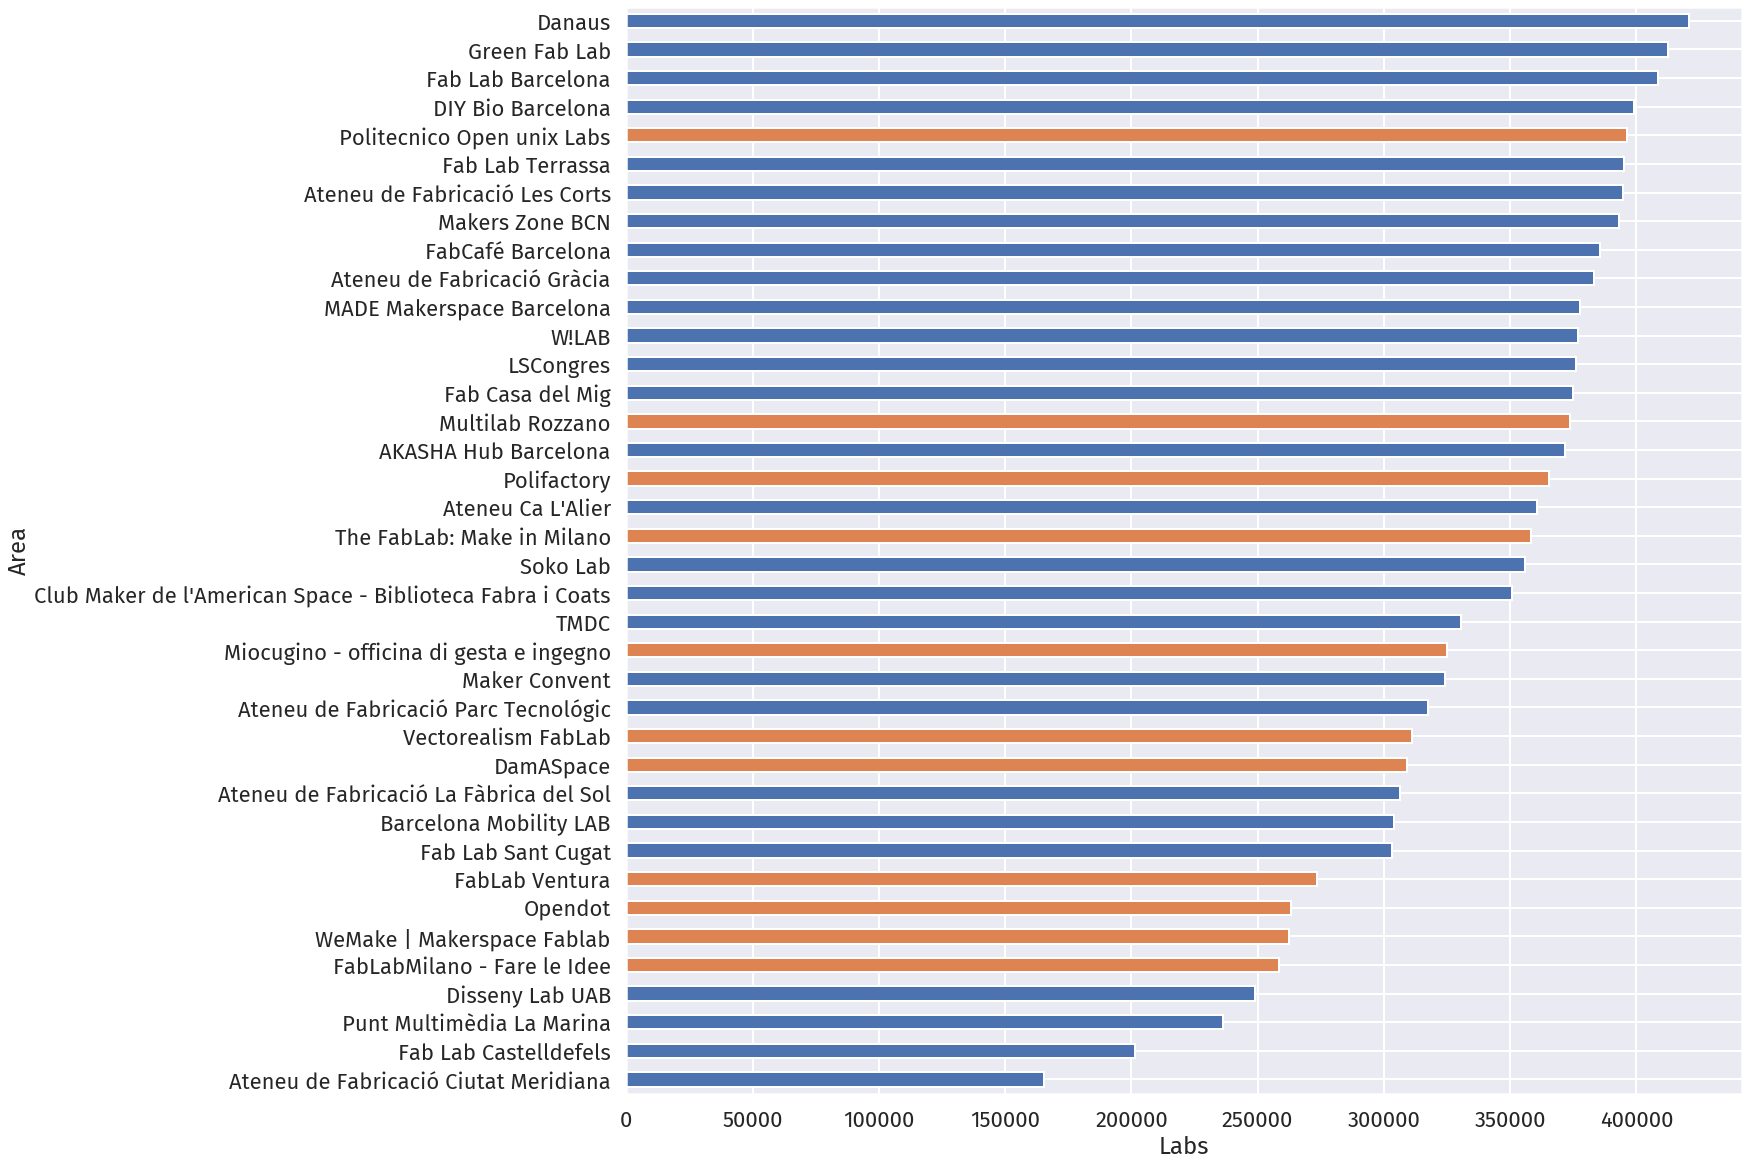

In [29]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
full_map_data.sort_values(by=['area'])['area'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['area'])['Cluster']], figsize=(20,20))
plt.ylabel('Area')
plt.xlabel('Labs')
plt.savefig("svg/labs_area_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_area_grouped_bar.png", dpi=300, bbox_inches="tight")

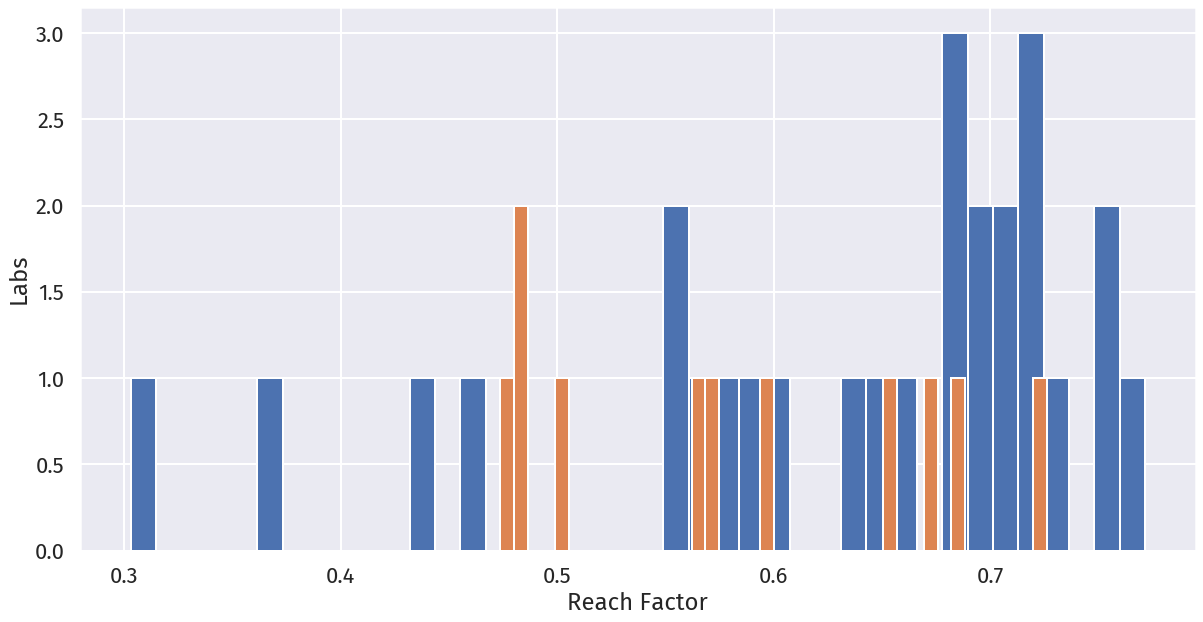

In [30]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
full_map_data.groupby("Cluster")["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg/labs_reachfactor_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_reachfactor_grouped_hist.png", dpi=300, bbox_inches="tight")

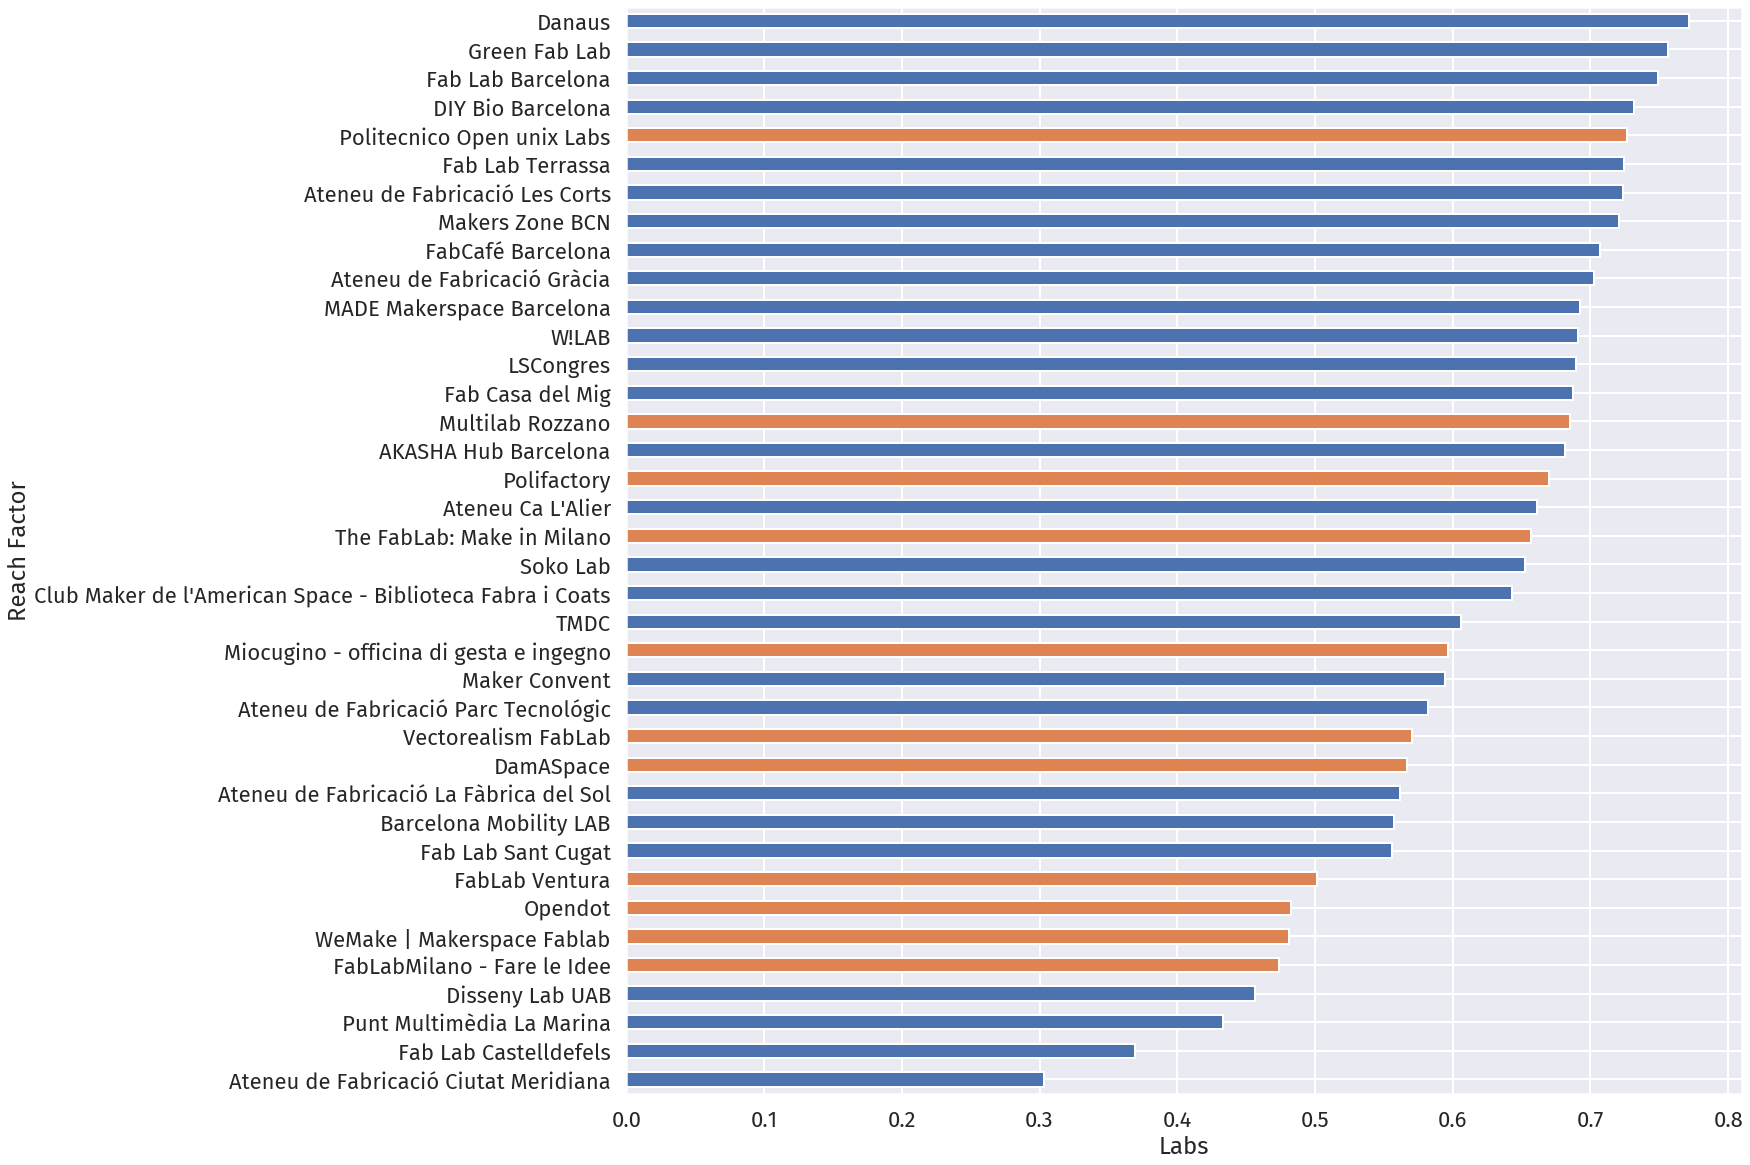

In [31]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
full_map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['reachfactor'])['Cluster']], figsize=(20,20))
plt.ylabel('Reach Factor')
plt.xlabel('Labs')
plt.savefig("svg/labs_reachfactor_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_reachfactor_grouped_bar.png", dpi=300, bbox_inches="tight")

## Isochrones

In [32]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [33]:
for iso in data:
  folium.GeoJson(iso, name="geojson").add_to(m)
for loc in locations:
  #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
  folium.Circle(
    radius=30,
    location=[locations[loc][1],locations[loc][0]],
    popup=loc,
    tooltip=loc,
    color="crimson",
    fill="crimson",
).add_to(m)


In [34]:
folium.LayerControl().add_to(m)
m

In [35]:
m.save("html/isochrones.html")

## Isochrones with color from population reached

In [36]:
linear = cmp.LinearColormap(
    ['yellow', 'green', 'blue'],
    vmin=map_data['total_pop'].min(), vmax=map_data['total_pop'].max(),
    caption='Total population'
)
linear

In [37]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [38]:
for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
  #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
  folium.Circle(
    radius=30,
    location=[locations[loc][1],locations[loc][0]],
    popup=loc,
    tooltip=loc,
    fill=True,
    color="crimson",
    fillColor="crimson"
).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

In [39]:
m.save("html/isochrones_popcolor.html")